In [109]:
import pandas as pd
from urllib.parse import urlparse
import re
import copy

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

## 数据读入，url简单处理

In [90]:
data = pd.read_csv('raw_data.txt',sep='\t', header=None,names=['url','raw_time'],dtype={'url':str,'raw_time':str})
data.insert(2,'time',data.raw_time.apply(lambda x: pd.to_datetime(x,format='%Y%m%d%H%M%S')))
data.pop('raw_time')
print('raw data:',len(data))

raw data: 1874249


In [91]:
test = copy.deepcopy(data.iloc[1:1000])
def url_parse(df):
    df['scheme'],df['domain'],df['path'],df['params'],df['query1'],df['fragment'] = zip(*df['url'].map(urlparse))

url_parse(data)
url_parse(test)

data['secondary_domain'] = data.domain.apply(lambda x: '.'.join(x.split('.')[-2:]))

## 数据展示

In [71]:
data.head()

,url,time,scheme,domain,path,params,query1,fragment,secondary_domain
0,http://0.dximscreenshot2.yy.yystatic.com/upl_7...,2016-10-10 21:23:12,http,0.dximscreenshot2.yy.yystatic.com,/upl_7b/1e/62/51166-108ecf0364f7382787d18d1462...,,,,yystatic.com
1,http://1.dximscreenshot8.yy.yystatic.com/upl_1...,2016-10-10 00:17:51,http,1.dximscreenshot8.yy.yystatic.com,/upl_1b/1c/9b/4655-0e1c6ebc0b2c60d5188fd2e79b1...,,,,yystatic.com
2,http://2.dximscreenshot3.yy.duowan.com/upl_AA/...,2016-10-10 21:30:03,http,2.dximscreenshot3.yy.duowan.com,/upl_AA/AA/AA/66611-b9e17892d28037f3b6f0aa052a...,,,,duowan.com
3,http://2.dximscreenshot5.yy.yystatic.com/upl_f...,2016-10-10 00:31:40,http,2.dximscreenshot5.yy.yystatic.com,/upl_f4/ba/59/112563-468ae11378dc58e9e10ca5215...,,,,yystatic.com
4,http://2.dximscreenshot5.yy.yystatic.com/upl_f...,2016-10-10 00:46:20,http,2.dximscreenshot5.yy.yystatic.com,/upl_f4/ba/59/112563-468ae11378dc58e9e10ca5215...,,,,yystatic.com


## 所有访问记录按照二级域名分类，并展示访问量最高的10个网站

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


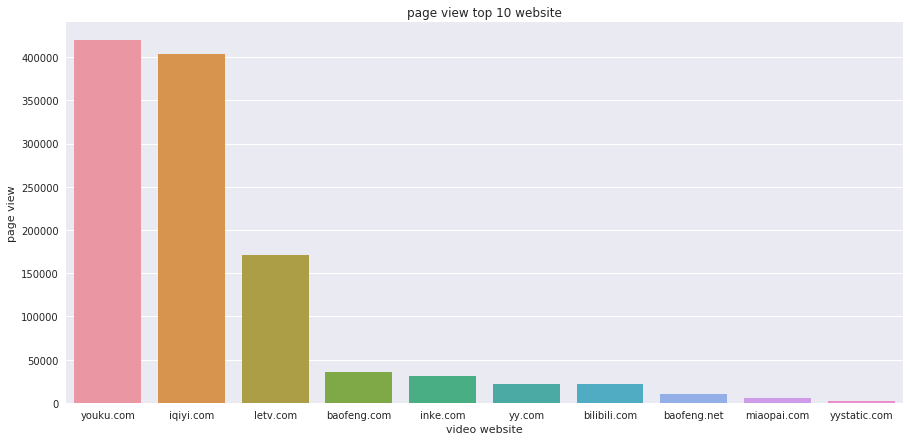

In [95]:
# data_plt = data.groupby('secondary_domain').count()
dts = data_plt.sort_values(by='url',ascending=False).iloc[:10]

plt.figure(figsize=(15,7))
sns.barplot(x = dts.index,y=dts.url)
plt.xlabel('video website')
plt.ylabel('page view')
plt.savefig('img/raw_top10.jpg')
plt.title('page view top 10 website')
plt.show()

## 数据清洗，筛选去除js,css,img,swf

In [96]:
def data_filter(df):
    df['valid'] = df.path.apply(lambda x :('.js' not in x) &
                                    ('.jpg' not in x) &
                                    ('favicon.ico' not in x) & 
                                    ('.css' not in x)  & 
                                    ('.png' not in x)  &
                                    ('.jpeg' not in x) &
                                    ('.mp3' not in x)  &
                                    ('.gif' not in x)  &
                                    ('.png' not in x)  &
                                    ('.inc' not in x)  &
                                    ('.swf' not in x)  &  # swf \approx flash 
                                    ('' != x) &
                                    ('/' != x))
    return df.loc[df.valid]
test = data_filter(test)

print('before:',len(data)) # 1874249 +
data = data_filter(data)
print('after:',len(data)) # 1144170

before: 1874249
after: 1143725


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


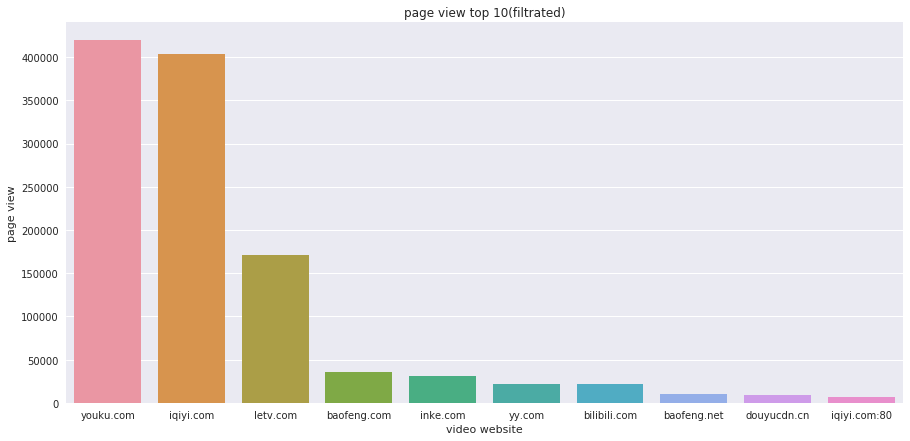

In [97]:
data_plt = data.groupby('secondary_domain').count()
dts = data_plt.sort_values(by='url',ascending=False).iloc[:10]

plt.figure(figsize=(15,7))
sns.barplot(x = dts.index,y=dts.url)
plt.xlabel('video website')
plt.ylabel('page view')
plt.title('page view top 10(filtrated)')
plt.savefig('filtrated_top10.jpg')
plt.show()

## 用户访问时间分析

In [130]:
# iqiyi = data.loc[data.secondary_domain == 'iqiyi.com']
# bilibili = data.loc[data.secondary_domain == 'bilibili.com']
# youku = data.loc[data.secondary_domain == 'youku.com']
# yy =  data.loc[(data.secondary_domain =='yy.com') | (data.secondary_domain == 'yystatic.com')]
valid_domain = set(['youku.com','acfun.cn','miaopai.com','iqiyi.com','meelive.tv','baofeng.net','inke.cn','acfun.tv',
                    'yy.com','inke.com','meelive.cn','inke.tv', 'baofeng.com', 'bilibili.cn',
                   'douyutv.com','letv.com','yystatic.com','bilibili.com'])



iqiyi = data.loc[data.secondary_domain.isin(['youku.com','iqiyi.com','letv.com','baofeng.com'])]
bilibili = data.loc[data.secondary_domain.isin(['bilibili.com','acfun.cn','acfun.tv'])]
# youku = data.loc[data.secondary_domain == 'youku.com']
yy =  data.loc[data.secondary_domain.isin(['miaopai.com','inke.cn','yy.com','inke.com','meelive.cn','meelive.tv','inke.tv','douyutc.com','yystatic.com'])]


print('iqiyi:',len(iqiyi))
print('bilibili:',len(bilibili))
print('youku:',len(youku))
print('yy:',len(yy))

iqiyi: 1029759
bilibili: 22071
youku: 419403
yy: 61599


In [131]:
def get_minute(x):
    return ((x - pd.datetime(1990,1,1)).total_seconds())%(60*60*24) / 60

time_iqiyi = iqiyi.time.apply(get_minute)
time_bilibili = bilibili.time.apply(get_minute)
# time_youku = youku.time.apply(get_minute)
time_yy = yy.time.apply(get_minute)

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


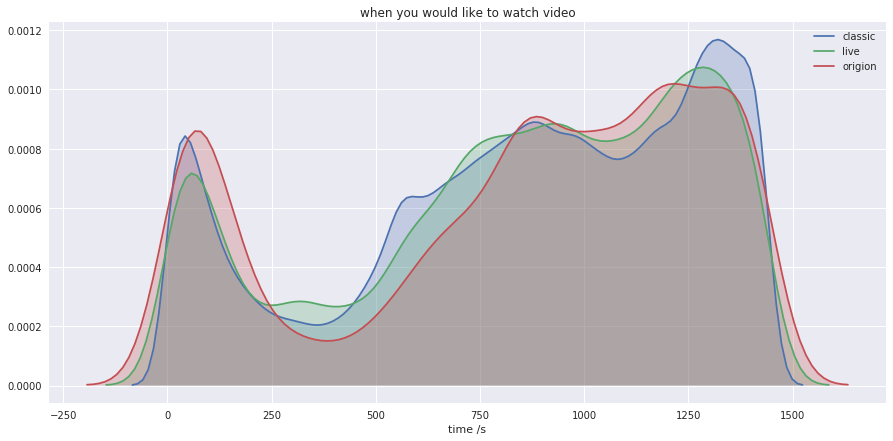

In [134]:
plt.figure(figsize=(15,7))
sns.kdeplot(time_iqiyi,shade=True,label = 'classic')
# sns.kdeplot(time_youku,shade=True,label = 'youku')
sns.kdeplot(time_yy,shade=True,label = 'live')
sns.kdeplot(time_bilibili,shade=True,label = 'origion')
plt.xlabel('time /s')
plt.title('when you would like to watch video')
plt.savefig('visit_time.jpg')
plt.show()

In [129]:
inke = data.loc[data.secondary_domain =='inke.com']
# inke.head(100)
inke.domain.unique()

array(['api.busi.inke.com', 'app.inke.com', 'image.scale.inke.com',
       'maidian.inke.com', 'media01.inke.com', 'media02.inke.com',
       'payment.service.inke.com', 'service.inke.com',
       'serviceinfo.inke.com', 'upload.inke.com', 'v.inke.com',
       'web.service.inke.com', 'webapi.busi.inke.com'], dtype=object)

In [128]:
inke.loc[567125].url

'http://image.scale.inke.com/imageproxy2/dimgm/scaleImage?url=&w=100&h=100&s=80&c=0&o=0'

## 仅保留二级域名在`valid_domain`列表中的访问请求

In [76]:
domain = data.domain.apply(lambda x: '.'.join(x.split('.')[-2:])).unique()
domain = set(map(lambda x: x.split(':')[0],domain))
print(len(domain))
print(domain)
print('-------')
valid_domain = set(['youku.com','acfun.cn','miaopai.com','iqiyi.com','meelive.tv','baofeng.net','inke.cn','acfun.tv',
                    'yy.com','inke.com','meelive.cn','inke.tv','http://www.yinyuetai.com/', 'baofeng.com', 'bilibili.cn',
                   'douyutv.com','letv.com','yystatic.com','bilibili.com'])

print('valid_domain',len(valid_domain))

data = data.loc[data.secondary_domain.isin(valid_domain)]

52
{'ylsw.net', 'anquanxia.com', '66liuxue.com', 'letv.cn', 'douyucdn.cn', 'yinyuetai.com', 'muzhiwan.com', 'sogou.com', 'mobygame.cn', 'miaozhen.com', 'bilibili.cn', 'youku.com', '9izuche.cn', 'hiido.cn', '51tv.com', 'onez.cn', 'irs01.com', 'yy.com', 'renmaihui123.com', 'teyali.com', 'yystatic.com', 'inke.cn', 'com.cn', 'golive-tv.com', 'xunwan.com', '517na.com', 'duoduotv.com', 'v-888.com', 'bilibili.com', 'miaopai.com', '727613.pw', 'baofeng.com', 'letv.com', 'acfun.tv', 'duowan.com', 'meelive.cn', 'inke.tv', 'meelive.tv', 'iqiyi.com', 'inke.com', 'hiido.com', 'online-downloader.com', 'acfun.cn', 'baofeng.net', '3dcq.com', 'xjistedu.cn', 'guangyv.com', 'qcloudcdn.com', 'idaddy.cn', 'douyutv.com', 'gugeanzhuangqi.com', '866868.com'}
-------
valid_domain 19


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


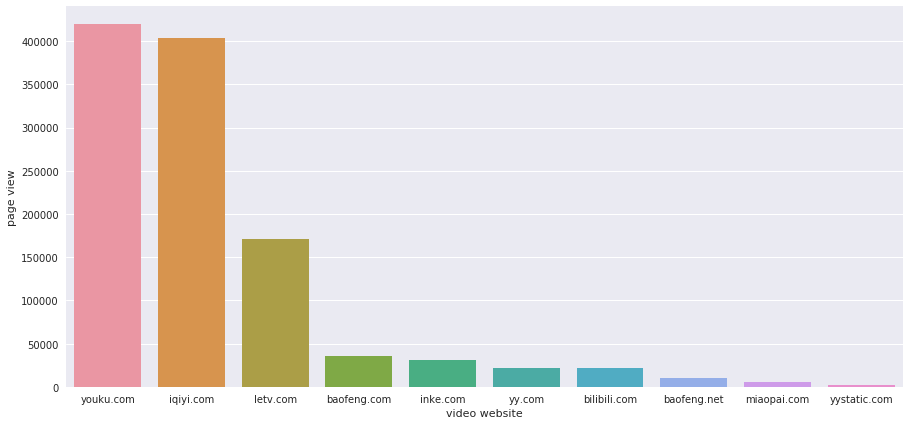

In [77]:
data_plt = data.groupby('secondary_domain').count()
dts = data_plt.sort_values(by='url',ascending=False).iloc[:10]

plt.figure(figsize=(15,7))
sns.barplot(x = dts.index,y=dts.url)
plt.xlabel('video website')
plt.ylabel('page view')
plt.savefig('img/valid_top10.jpg')
plt.show()

In [78]:
# i = len(data.loc[data.secondary_domain =='iqiyi.com'])
# b = len(data.loc[data.secondary_domain =='bilibili.com'])
# y = len(data.loc[data.secondary_domain =='youku.com'])
# o = len(data) - i - b - y
# plt.figure(figsize=(10,10))
# plt.pie(x=[i,b,y,o],labels=['iqiyi','bilibili','youku','others'])
# plt.savefig('valid_distribute.jpg')
# plt.show()

In [41]:
print('data filtrated:',len(data))

data filtrated: 1123314


# 提取所需要三家视频网站的访问记录

## Bilibili information

In [52]:
bilibili = data.loc[(data.domain.apply(lambda x: x.split('.')[-2] == 'bilibili'))]
print('total:',len(bilibili.groupby('domain').count()))

total: 26


In [53]:
bilibili.groupby('domain').count().sort_values('url',ascending=False).head(5)

,url,time,scheme,path,params,query1,fragment,secondary_domain,valid
domain,,,,,,,,,
api.bilibili.com,7495,7495,7495,7495,7495,7495,7495,7495,7495
app.bilibili.com,5585,5585,5585,5585,5585,5585,5585,5585,5585
data.bilibili.com,3514,3514,3514,3514,3514,3514,3514,3514,3514
message.bilibili.com,1492,1492,1492,1492,1492,1492,1492,1492,1492
live.bilibili.com,1397,1397,1397,1397,1397,1397,1397,1397,1397


### 人工对属于bilibili的所有域名进行筛选后，对相关信息进行保存

In [60]:
# ----------------valid -------------
# http://bangumi.bilibili.com/ 番剧，只有两条记录，舍弃
# live.bilibili.com ignore
# www.bilibili.com 主页

bilibili_video = bilibili.loc[(bilibili.path.apply(lambda x : True if re.match(r'[\w\W]+av\d{6,}',x) is not None else False))]
bilibili_video2 = bilibili.loc[(bilibili.path.apply(lambda x : True if re.match(r'/anime/v/\d{5,}',x) is not None else False))]


print('total:',len(bilibili))
print('video1:',len(bilibili_video))
print('video2:',len(bilibili_video2))

aid = set(bilibili_video.path.apply(lambda x: re.findall(r'(?<=av)\d{6,}',x)[0]))

bilibili_video  =copy.deepcopy(bilibili_video)
bilibili_video['aid'] = bilibili_video.path.apply(lambda x: re.findall(r'(?<=av)\d{6,}',x)[0])



bilibili_video.loc[:,['aid','path','time']].to_csv('bilibili_aid.csv',index=False,header=None)
print('valid id:',len(aid))
with open('bilibili_unique_aid.txt','w') as F:
    for item in aid:
        F.write(item+'\n')

total: 21735
video1: 104
video2: 2
valid id: 64


## Youku information

In [54]:
youku = data.loc[(data.domain.apply(lambda x: x.split('.')[-2] == 'youku'))]
print('total:',len(youku.groupby('domain').count()))

total: 201


In [55]:
youku.groupby('domain').count().sort_values('url',ascending=False).head(5)

,url,time,scheme,path,params,query1,fragment,secondary_domain,valid
domain,,,,,,,,,
statis.api.3g.youku.com,112187,112187,112187,112187,112187,112187,112187,112187,112187
api.mobile.youku.com,85089,85089,85089,85089,85089,85089,85089,85089,85089
k.youku.com,28238,28238,28238,28238,28238,28238,28238,28238,28238
count.atm.youku.com,14967,14967,14967,14967,14967,14967,14967,14967,14967
user-mobile.youku.com,13201,13201,13201,13201,13201,13201,13201,13201,13201


### 对访问量较大的20个域名进行筛选


> 以下结果均是访问对应url（不是直接访问domain）得到的结果

+ statis.api.3g.youku.com 无响应
+ api.mobile.youku.com 返回无用json
+ k.youku.com 出错
+ count.atm.youku.com 无响应
+ user-mobile.youku.com 出错
+ push.m.youku.com 出错
+ v.l.youku.com 出错
+ val.atm.youku.com 无响应
+ das.api.mobile.youku.com 出错
+ p.l.youku.com 出错
+ stat.youku.com 无用

In [66]:
#-------------------------invalid--------------------------
# http://3g.youku.com/ invalid
# http://4g.youku.com/  -->http://err.taobao.com invalid
# http://ad.api.3g.youku.com  - ads!!!!!!!!!!!!!

#------------------------valid--------------------------
# video itself http://v.youku.com/v_show/id_XMTkyODgxMTYwMA==.html 
# video danmu  http://p.l.youku.com/interact?type=show&tcode=plugin&stype=2&ptype=note&pid=104213&vid=XOTI5MTc3Mzk2&ext=device%3D2%26anywhere_type%3D1%26is_anywhere%3D1%26sub_wintype%3D0%26platform%3D10%26lib_channel_id%3D16261163&turl=http://v.youku.com/v_show/id_XMTQ0NTQ0NDYyNA==.html&wintype=112&rurl=http%3A%2F%2Fhudong.pl.youku.com%2Fv%2FtimelineH5ForAppCard%3FvideoId%3DXOTI5MTc3Mzk2%26plugin_id%3D0%26ybhpss%3Dcntid%253DXOTI5MTc3Mzk2%2526typeid%253D2%2526cpid%253D16261163%2526puid%253D%2526pguid%253D6d67976f232b8b39700816217bf3552e%2526horizon%253D0%2526page%253Dyouku_card%2526label%253Dcard_click%2526utdid%253DV8A12usaX%252BoDAFK6%252FnIQBD3g%2526token%253Dc192cb2102f8a3ef5bcab172cbe16051


print('youku:',len(youku))

youku_video1 = youku.loc[(youku.domain=='v.youku.com') & (youku.path.apply(lambda x : True if re.match(r'/v_show/id_[^\.]+.html',x) is not None else False))]
youku_video2 = youku.loc[(youku.domain=='p.l.youku.com') & (youku.query1.apply(lambda x: True if len(re.findall(r'http://v.youku.com/v_show/id_[^\.]+.html',x))>0 else False ))]
print('youku_video1:',len(youku_video1))
print('youku_video2:',len(youku_video2))

youku_video = pd.concat([youku_video1,youku_video2])

print('youku_video:',len(youku_video))
youku_video['id'] = youku_video.url.apply(lambda x: re.findall(r'(?<=id_)[^\.]+',x)[0])
youku_video.loc[:,['id','url','time']].to_csv('raw_data/youku_id.csv',index=False,header=None)

youku_id = set(youku_video.id)
print('valid id:',len(youku_id))
with open('youku_unique_id.txt','w') as F:
    for item in youku_id:
        F.write(item+'\n')

youku: 419403
youku_video1: 2983
youku_video2: 328
youku_video: 3311
valid id: 2113


## iqiyi information

In [58]:
iqiyi = data.loc[data.domain.apply(lambda x: 'iqiyi.com' in x)]
iqiyi = copy.deepcopy(iqiyi)
print('iqiyi: ',len(iqiyi.groupby('domain')))

iqiyi:  124


In [57]:
iqiyi.groupby('domain').count().sort_values('url',ascending=False).head(5)

,url,time,scheme,path,params,query1,fragment,secondary_domain,valid
domain,,,,,,,,,
policy.video.iqiyi.com,45984,45984,45984,45984,45984,45984,45984,45984,45984
mbdlog.iqiyi.com,40131,40131,40131,40131,40131,40131,40131,40131,40131
pdata.video.iqiyi.com,40109,40109,40109,40109,40109,40109,40109,40109,40109
msg.iqiyi.com,38704,38704,38704,38704,38704,38704,38704,38704,38704
iface2.iqiyi.com,31657,31657,31657,31657,31657,31657,31657,31657,31657


> 以下结果均是访问对应url（不是直接访问domain）得到的结果

+ policy.video.iqiyi.com 返回一个奇怪的东西
+ mbdlog.iqiyi.com 无响应
+ pdata.video.iqiyi.com 奇怪的东西
+ msg.iqiyi.com 无响应
+ iface2.iqiyi.com 无响应
+ data.video.iqiyi.com 	奇怪的东西
+ msga.cupid.iqiyi.com  奇怪的东西
+ ifacelog.iqiyi.com 返回 OK？
+ cmonitor.iqiyi.com 返回奇怪的东西
+ l.rcd.iqiyi.com 页面出错&不安全？？？
+ subscription.iqiyi.com 没用
+ puma.api.iqiyi.com 没用
+ pb.im.iqiyi.com 服务器返回:An error occurred.
+ t7z.cupid.iqiyi.com 出错
+ cmts.iqiyi.com 502
+ **m.iqiyi.com 手机端视频首页！**
+ cache.m.iqiyi.com 手机缓存，打开后是一个下载页233
+ up.video.iqiyi.com 奇怪的结果
+ **www.iqiyi.com PC端视频首页 **

In [59]:
# mobile
# zongyi 7        ignore
# yinyue 5        ignore
# a_     23       ignore
# weidianying 1   ignore
# lib    15       ignore
# *.swf           ignore
# /common         ignore

# iqiyi1 = iqiyi.loc[(iqiyi.domain=='m.iqiyi.com') & (iqiyi.path.apply(lambda x:True if re.match(r'/lib',x) is None else False))]
# iqiyi1

In [67]:
iqiyi_video1 = iqiyi.loc[(iqiyi.domain=='www.iqiyi.com') & (iqiyi.path.apply(lambda x: True if  re.match(r'/(w|v)_[^.]+.html',x) is not None else False ))]
iqiyi_video2 = iqiyi.loc[(iqiyi.domain=='m.iqiyi.com') & (iqiyi.path.apply(lambda x: True if  re.match(r'/(w|v)_[^.]+.html',x) is not None else False ))]
print('iqiyi video1:',len(iqiyi_video1))
print('iqiyi video2:',len(iqiyi_video2))

iqiyi_video =pd.concat([iqiyi_video1,iqiyi_video2])
print('iqiyi video:',len(iqiyi_video))

iqiyi_video['id'] = iqiyi_video.path.apply(lambda x: re.search(r'/(w|v)\_[^.]+',x).group(0))
iqiyi_video.loc[:,['id','url','time']].to_csv('raw_data/iqiyi_id.csv',index=False,header=None)

iqiyi_id = set(iqiyi_video.id)

with open('qiyi_unique_id.txt','w') as F:
    for item in iqiyi_id:
        F.write(item+'\n')

iqiyi video1: 205
iqiyi video2: 688
iqiyi video: 893


In [64]:
sns.sca